In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv("generated_data.csv")
df = df.drop(["Unnamed: 0"],axis = 1)
df

,x,y
0,18.0,5.631
1,33.0,11.016
2,9.0,2.161
3,29.0,9.866
4,15.0,4.091
...,...,...
95,23.0,7.556
96,13.0,3.701
97,16.0,4.476
98,2.0,-0.919


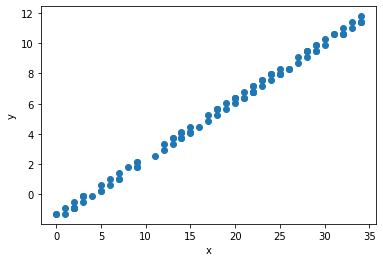

In [94]:
plt.scatter(df["x"],df["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [95]:
x_train = df[["x"]][:85]
x_test = df[["x"]][:15]
y_train = df[["y"]][:85]
y_test = df[["y"]][:15]

In [96]:
x_train = x_train.values.reshape(-1).tolist()
x_test = x_test.values.reshape(-1).tolist()

In [97]:
y_train = y_train.values.reshape(-1).tolist()
y_test = y_test.values.reshape(-1).tolist()

In [61]:
20 * x_train + 200

TypeError: can only concatenate list (not "int") to list

In [98]:
#target: ydata = w * xdata + b
b = 200
w = 20
lr = 0.00001

b_history = [b]
w_history = [w]

for i in range(100000):
    b_grad = 0.0
    w_grad = 0.0
    
    for n in range(len(x_train)):
        b_grad = b_grad - 2 * (y_train[n] - (w * x_train[n] + b))
        w_grad = w_grad - 2 * (y_train[n] - (w * x_train[n] + b)) * x_train[n]
        
    b = b - lr * b_grad
    w = w - lr * w_grad
    
    b_history.append(b)
    w_history.append(w)

    
[w_history[-1], b_history[-1]]   

[0.38549102662298795, -1.5187497160738939]

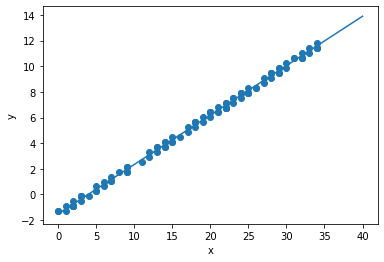

In [99]:
x = np.linspace(0,40,1000)
f = lambda x: w_history[-1] * x + b_history[-1]
y = f(x)

plt.scatter(df["x"],df["y"])
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [100]:
x_test[8]

24.0

In [101]:
y_test[8]

7.936

In [102]:
[w_history[-1] * x_test[8] + b_history[-1], (y_test[8] - (w_history[-1] * x_test[8] + b_history[-1])) ** 2]

[7.733034922877818, 0.04119482253121339]

In [108]:
x_t = []
y_p = []
loss = []

for n in range(len(x_test)):
    x_t.append(x_test[n]) 
    y_p.append(w_history[-1] * x_test[n] + b_history[-1])
    loss.append((y_test[n] - (w_history[-1] * x_test[n] + b_history[-1])) ** 2)

cols = ["x","real_y","predict_y","loss"]    
pd.DataFrame([x_t, y_test, y_p, loss], cols).T    

,x,real_y,predict_y,loss
0,18.0,5.631,5.420089,0.044484
1,33.0,11.016,11.202454,0.034765
2,9.0,2.161,1.950670,0.044239
3,29.0,9.866,9.660490,0.042234
4,15.0,4.091,4.263616,0.029796
5,14.0,4.091,3.878125,0.045316
6,17.0,4.856,5.034598,0.031897
7,13.0,3.321,3.492634,0.029458
8,24.0,7.936,7.733035,0.041195
9,13.0,3.706,3.492634,0.045525
